<a href="https://colab.research.google.com/github/Koitoresu/Micro-Credential-Winter-2022/blob/main/CodeLab/WeekThree/KNN%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [ ]:
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0'], 1, inplace=True)

In [ ]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating an instance of the StandardScaler class
scalar = StandardScaler()

In [ ]:
# Training our "model" to search for patterns within the data
# excluding the data from 'Target Class'
scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [ ]:
# Transform is similar to Shape? takes x and copy arguments
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))

In [ ]:
# Recreating the Data Frame using scaled features as the Data entries and 
# all columns from old data frame except the last column, Target Class
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [ ]:
df_feature

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [ ]:
# importing train_test_split to be used for prediction
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.3)

In [ ]:
# Importing the KNN lib
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Creating an instance of the KNN Class 
knn = KNeighborsClassifier(1)

In [ ]:
# Training our model to search for patterns within the DF
knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Enables us to predict the data values 
predict = knn.predict(xTest)

In [ ]:
predict

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
# Importing the classfication_report and confusion matrix modules
# from SKLearn lib
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Printing a confusion matrix (unappealing visual)
print(confusion_matrix(yTest, predict))

[[131  22]
 [ 12 135]]


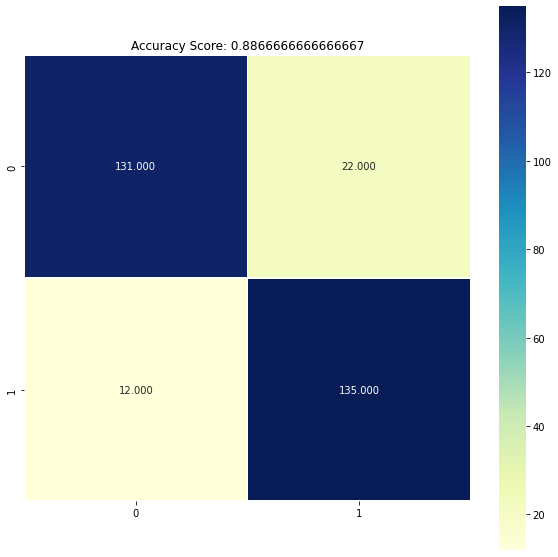

In [ ]:
# Creating a more appealing confusion matrix model using a combo of sns and plt

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(yTest, predict), 
            annot=True, 
            fmt='.3f', 
            linewidths=.5, 
            square=True, 
            cmap='YlGnBu')
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(xTest,yTest)}'
plt.title(all_sample_title, size=12);

In [ ]:
print(classification_report(yTest, predict))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       153
           1       0.86      0.92      0.89       147

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



### Using K = 5

In [ ]:
knn = KNeighborsClassifier(5)

In [ ]:
knn.fit(xTrain, yTrain)

KNeighborsClassifier()

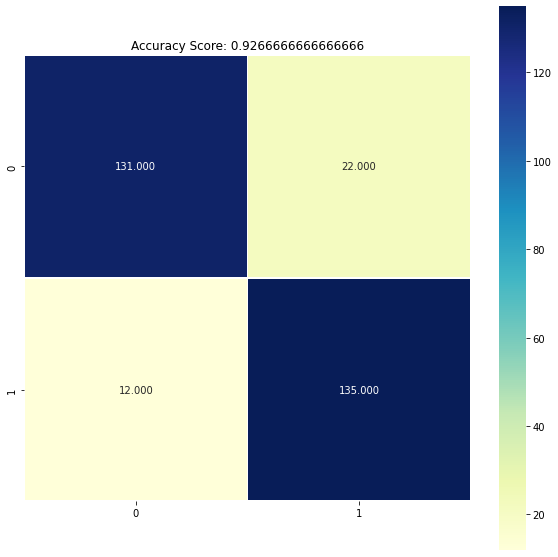

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(yTest, predict), 
            annot=True, 
            fmt='.3f', 
            linewidths=.5, 
            square=True, 
            cmap='YlGnBu')
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(xTest,yTest)}'
plt.title(all_sample_title, size=12);

# K Value and Accuracy

In [ ]:
from sklearn import metrics

In [ ]:
score = []

In [ ]:
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xTrain, yTrain)
  y_pred = knn.predict(xTest)
  score.append(metrics.accuracy_score(yTest, y_pred))

print(score)

[0.8866666666666667, 0.8966666666666666, 0.9133333333333333, 0.93, 0.9266666666666666, 0.9333333333333333, 0.9266666666666666, 0.94, 0.9333333333333333, 0.93, 0.93, 0.9333333333333333, 0.92, 0.9366666666666666, 0.9266666666666666, 0.93, 0.9333333333333333, 0.9333333333333333, 0.9366666666666666, 0.9366666666666666, 0.93, 0.94, 0.93, 0.9366666666666666, 0.9266666666666666, 0.93, 0.93, 0.93, 0.9333333333333333, 0.94, 0.9366666666666666, 0.94, 0.9366666666666666, 0.9366666666666666, 0.94, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334, 0.9366666666666666]


TypeError: ignored

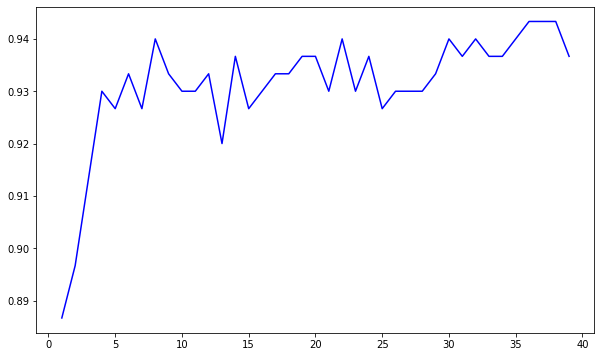

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), score, color='blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Error Rate & K Value

In [ ]:
error_rate = []
# Might take some time
for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xTrain, yTrain)
  pred_i = knn.predict(xTest)
  error_rate.append(np.mean(pred_i != yTest))

TypeError: ignored

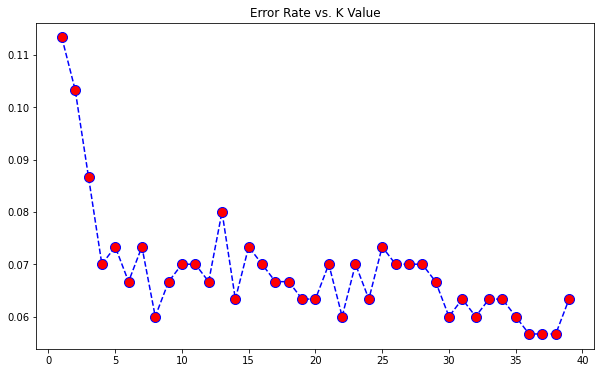

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color ='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')